## CDades Sprint 4 Tasca 2

### Exercici 1
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA".  
Hemos realizado la práctica anotando lo que nos ha parecido necesario para entender el contenido.

### Exercici 2
Fes les tasques de preprocessat i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df_movies = pd.read_csv('movies.dat', sep ='::', encoding = 'latin-1', engine='python', header = None, names = ('Movie_id','Nombre','Genero'))

In [3]:
df_movies.head()

,Movie_id,Nombre,Genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
Año = df_movies['Nombre'].str.slice(start=-5, stop=-1) # Separamos con un slice la información de los años

In [5]:
df_movies['Año'] = Año # Creamos una nueva columna en el dataset con la información obtenida

In [6]:
df_movies['Nombre'] = df_movies['Nombre'].str.slice(start=0, stop=-7) # Separamos con un split el nombre de las películas

In [7]:
Genero = df_movies['Genero'].str.split(pat='|', n=1, expand=True)  # Separamos con un split el género de las películas

In [8]:
df_movies['Genero'] = Genero[0] # nos quedamos con el primer resultado/columna del dataset obtenido

In [9]:
df_movies.head()  # dataset con la información organizada

,Movie_id,Nombre,Genero,Año
0,1,Toy Story,Animation,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995


In [10]:
df_movies.dtypes  # vemos los tipos de nuestros datos

Movie_id     int64
Nombre      object
Genero      object
Año         object
dtype: object

In [11]:
df_movies.Año = df_movies.Año.astype('int64')  # pasamos a enteros la columna de año para poder graficar

In [12]:
df_movies.dtypes

Movie_id     int64
Nombre      object
Genero      object
Año          int64
dtype: object

Tenemos un dataset con dos variables categóricas nominales y dos numéricas discretas.

In [13]:
df_movies.duplicated().sum()  # vemos si hay registros duplicados

0

In [14]:
df_movies.isnull().sum()  # vemos si tenemos nulos

Movie_id    0
Nombre      0
Genero      0
Año         0
dtype: int64

In [15]:
df_movies.isna().sum() # vemos si tenemos Nans

Movie_id    0
Nombre      0
Genero      0
Año         0
dtype: int64

In [16]:
df_movies.to_csv('movies.csv', index = False, sep ='\t', encoding='utf-8')  # lo dejamos preparado en un archivo .csv

### Exercici 3
Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?
Fes una o dues representacions gràfiques i justifica la teva elecció.

#### Evolución de la producción en el tiempo.

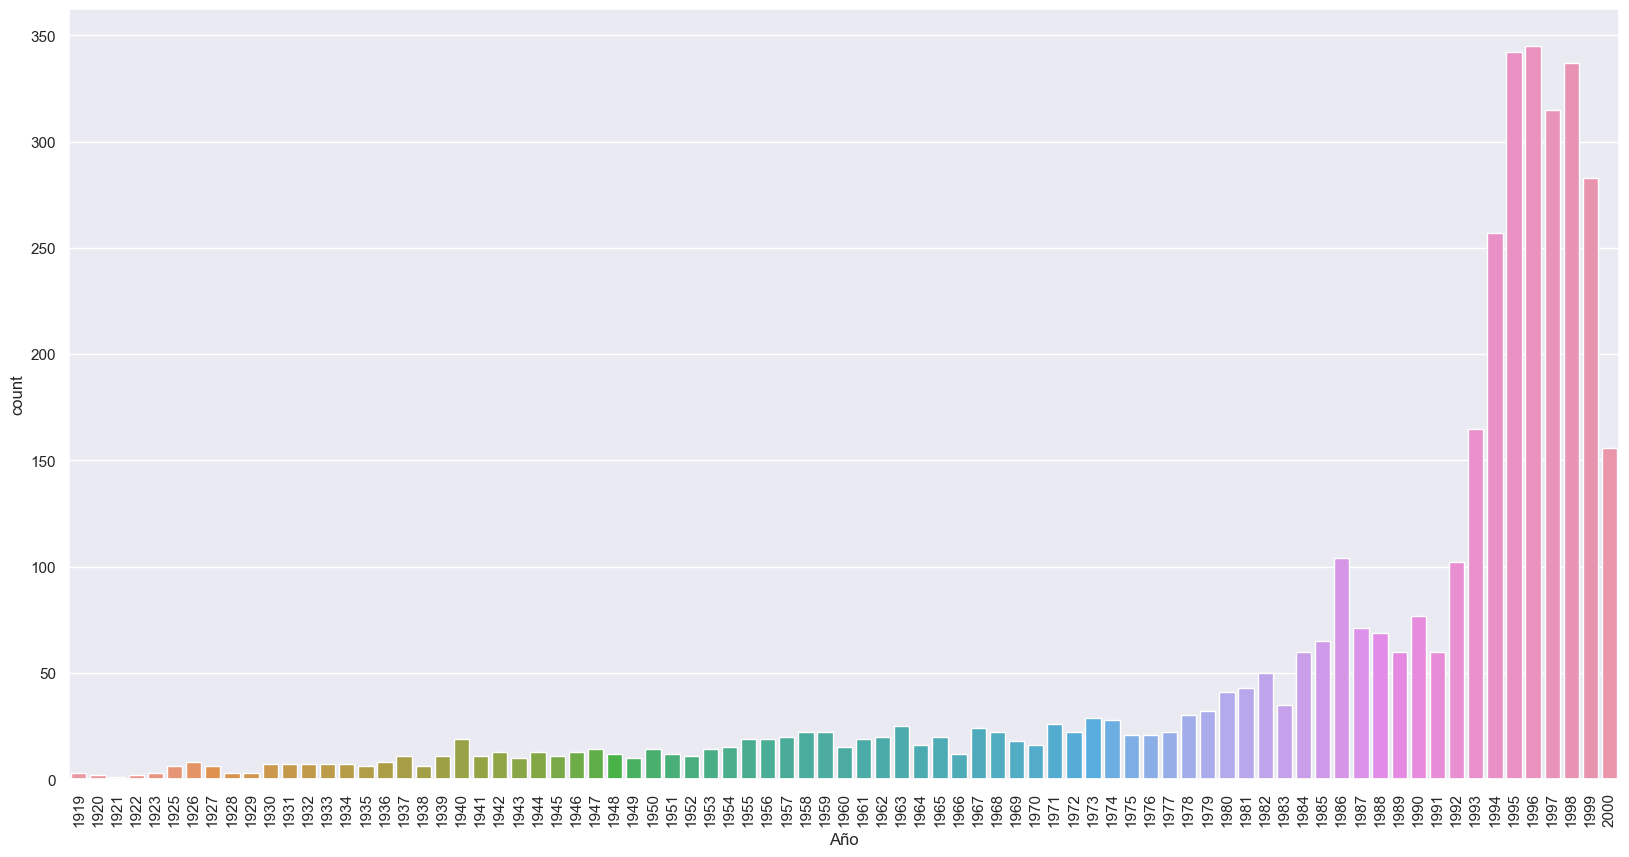

In [17]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.countplot(data=df_movies, x="Año");
plt.xticks(rotation=90);

Vemos que el crecimiento ha sido constante. Hubo una aceleración a finales de la década de los años setenta llegándose a triplicar la producción en la década de los noventa. Los años más productivos fueron desde 1995 a 1998 y a partir de aquí fue decayendo a la mitad en el año 2000.

#### Estudio de los géneros más filmados.

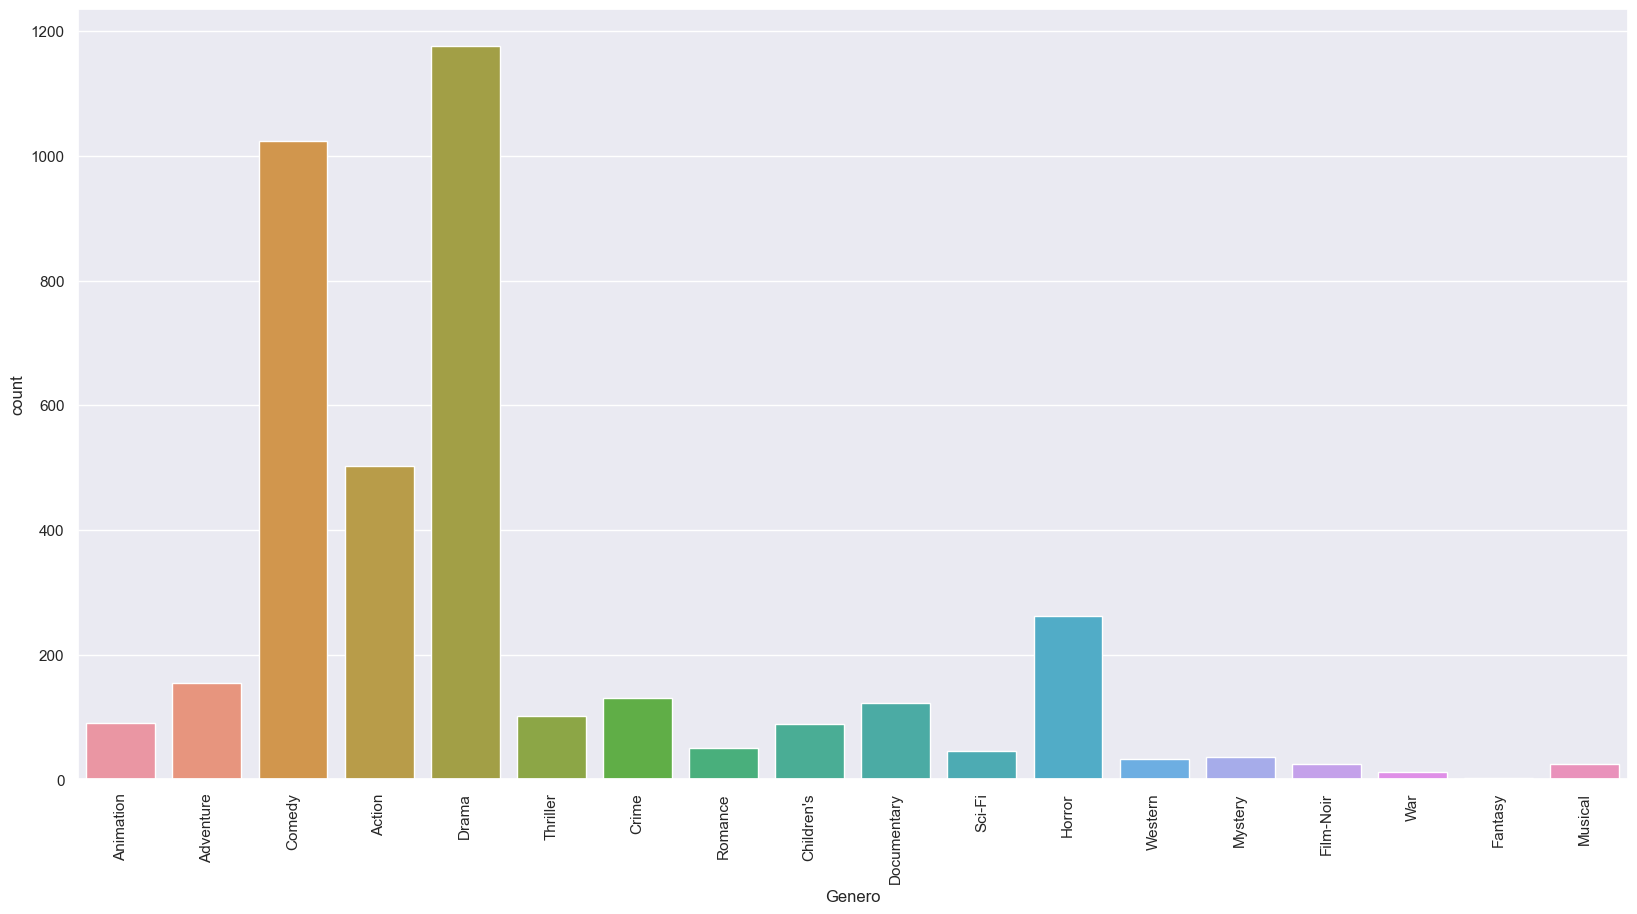

In [18]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.countplot(data=df_movies, x="Genero");
plt.xticks(rotation=90);

Drama y comedia son, con diferencia, los géneros más filmados. También destacan acción y horror. En menor producción western, misterio y cine negro y prácticamente inexistentes guerra, fantasía y musical.

#### Pensamos que a los largo del tiempo los gustos han ido cambiando y que tiene sentido repetir este análisis haciendo dos grupos, desde el origen hasta 1970, y después en los años de más producción, entre 1995 y 1998.

#### Análisis de los géneros entre hasta los años 1970.

In [33]:
df_movies_1980 = df_movies[df_movies.Año.isin(range(1919,1970))][['Genero','Año']] # filtramos el dataset

In [34]:
df_movies_1980.head()

,Genero,Año
152,Drama,1967
197,Drama,1964
386,Action,1965
553,Drama,1962
590,Animation,1937


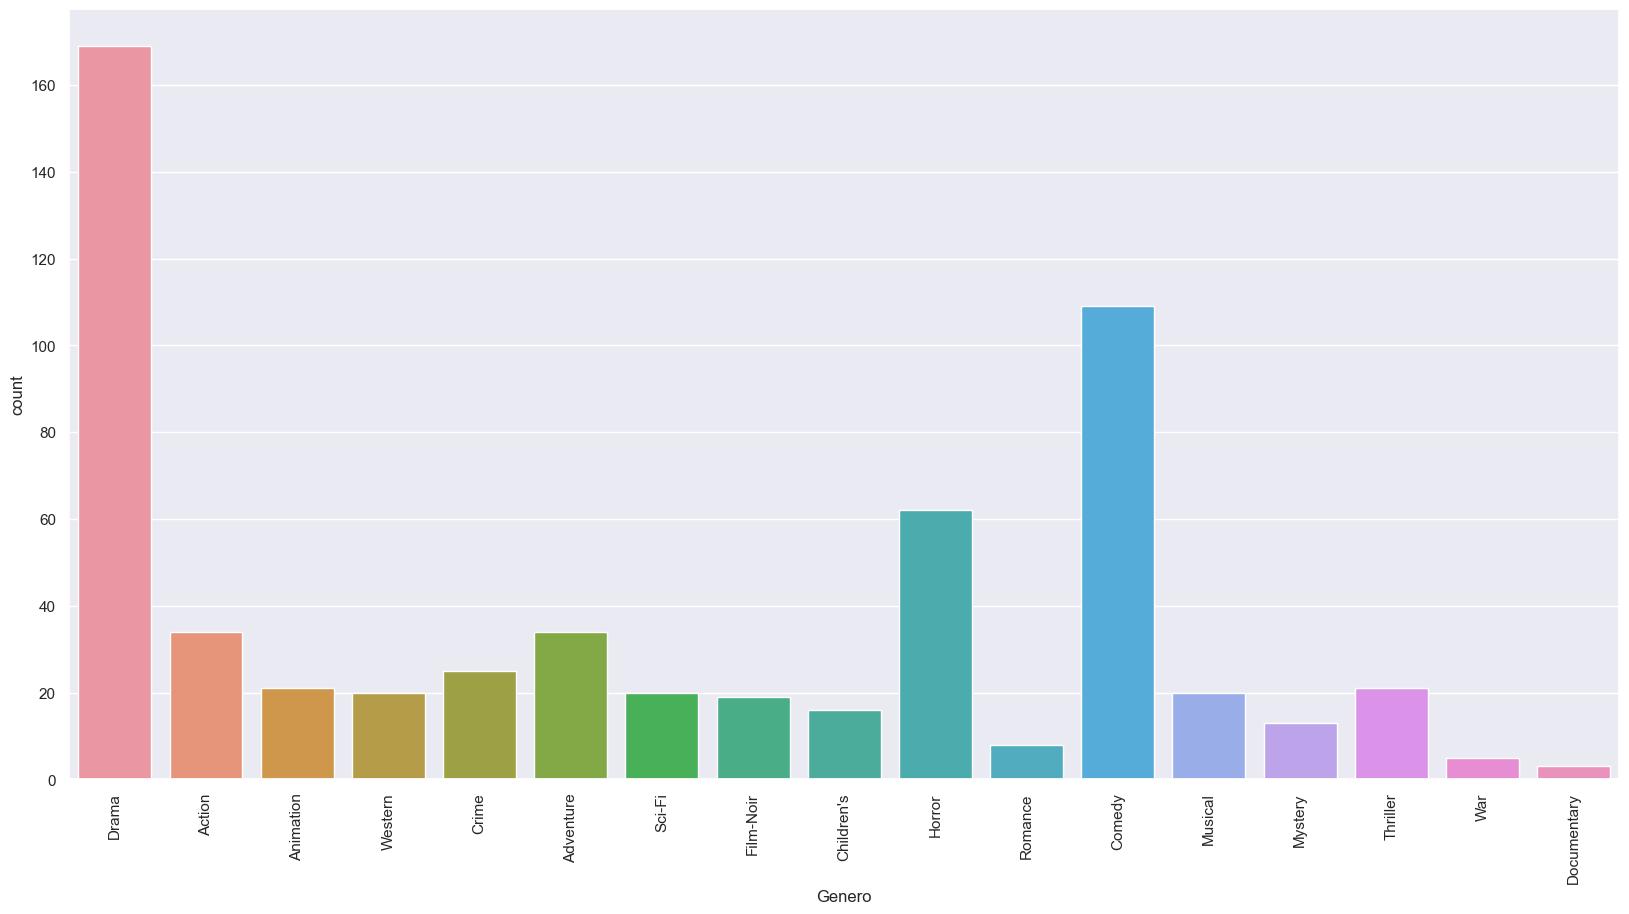

In [35]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.countplot(data=df_movies_1980, x="Genero");
plt.xticks(rotation=90);

Observamos que drama, comedia y horror son los géneros más filmados. El resto de géneros estan más o menos proporcionados, destacando acción y aventura y siendo minoritarios guerra y documentales. 

#### Análisis de los géneros entre los años 1995 y 1998.

In [37]:
df_movies_9598 = df_movies[df_movies.Año.isin([1995,1996,1997,1998])][['Genero','Año']] # filtramos el dataset

In [38]:
df_movies_9598.head()

,Genero,Año
0,Animation,1995
1,Adventure,1995
2,Comedy,1995
3,Comedy,1995
4,Comedy,1995


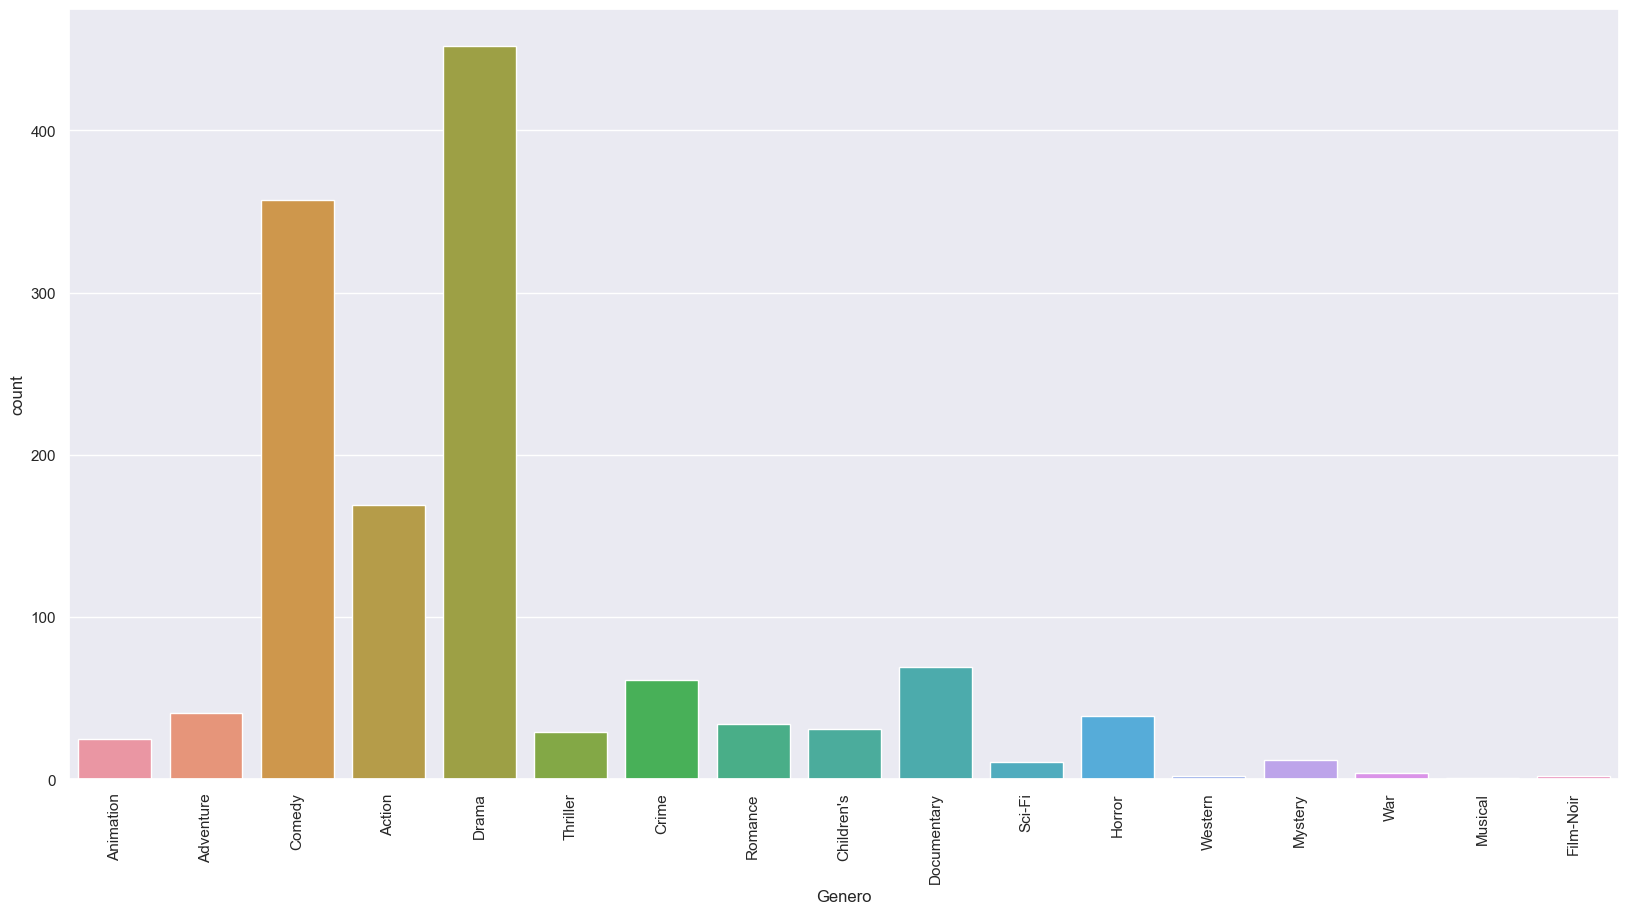

In [39]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.countplot(data=df_movies_9598, x="Genero");
plt.xticks(rotation=90);

En este periodo vemos que desctacan drama, comedia y acción. La producción en el resto de géneros es mucho menor, casi inexistente en western, guerra, musical y cine negro.

#### Comparando los dos periodos.
Podemos ver que se mantiene en el tiempo la aficción por el drama y la comedia. Observamos que desaparecen géneros que antes tenían presencia, como western, misterio y musical.